## Preparación del notebook

In [1]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [39]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

## Creación de dataset

In [40]:
#Creación sintética de clusters
features, true_labels = make_blobs(n_samples=300,
                                   centers=3,
                                   cluster_std= 3.5,
                                   random_state=42)

In [41]:
features[:5]

array([[ -8.48739034,  -9.85456489],
       [ -9.89107397,  -8.226054  ],
       [  0.36970957,   4.74133335],
       [  3.87799462,   5.81888867],
       [-14.01306306, -10.40841168]])

In [42]:
true_labels[:5]

array([2, 2, 0, 1, 2])

## Preprocesamiento de los datos

In [43]:
# Escalado de características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [44]:
scaled_features[:5]

array([[-1.14403699, -1.48834982],
       [-1.37745303, -1.27155871],
       [ 0.32879435,  0.45468967],
       [ 0.91218081,  0.59813631],
       [-2.06289124, -1.56207918]])

## Algoritmo K-means

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [45]:
# Creación de modelo de Kmeans
kmeans = KMeans(init="random",
                n_clusters=3,
                n_init=10,
                max_iter=100,
                random_state=42)

In [46]:
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=100, n_clusters=3, n_init=10, random_state=42)

In [47]:
# el valor del SSE mas bajo
print("valor del SSE mas bajo: ", kmeans.inertia_)

# Coordenadas de los centroides
print(kmeans.cluster_centers_)

# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)

valor del SSE mas bajo:  142.7309726068816
[[-0.26104731  1.0085765 ]
 [ 1.14711308  0.11607295]
 [-0.91319024 -1.1590775 ]]
Numero de iteraciones:  4


In [48]:
# Etiqueta de los datos generadas por Kmeans
kmeans.labels_[:5]

array([2, 2, 0, 1, 2], dtype=int32)

In [32]:
#Predecir valores de etiquetas
label = kmeans.fit_predict(scaled_features)

print(label)

[2 2 0 1 2 1 0 1 0 0 0 1 0 0 2 0 2 0 0 0 1 0 1 2 0 2 2 0 1 0 0 0 2 0 2 0 2
 1 2 1 1 0 2 1 0 0 2 1 2 1 1 2 2 1 2 1 2 0 1 0 2 1 1 1 2 1 1 2 2 0 1 2 2 0
 0 2 2 1 0 1 0 0 2 0 1 2 2 1 1 0 2 0 2 0 0 2 2 0 2 2 1 0 1 0 0 0 0 0 1 2 1
 0 0 0 0 1 2 0 2 1 1 1 1 2 2 2 2 0 2 2 0 0 0 0 0 1 1 2 0 2 0 0 1 0 1 1 1 0
 1 0 0 2 1 2 0 1 1 2 2 0 0 2 2 2 0 2 1 0 0 0 0 0 1 0 1 1 1 0 1 1 2 0 2 1 1
 2 1 1 2 1 2 2 1 2 1 0 1 1 0 2 0 0 1 1 0 1 2 2 1 0 0 2 1 0 2 2 0 2 0 2 2 0
 2 2 0 1 2 2 1 0 0 2 0 2 1 1 2 1 2 2 2 1 1 0 2 1 1 1 2 1 2 1 2 1 1 2 1 0 2
 0 0 0 2 0 1 1 2 1 1 0 0 1 1 1 2 2 2 0 1 0 1 1 1 1 2 1 2 1 1 2 0 1 1 0 2 0
 1 0 2 2]


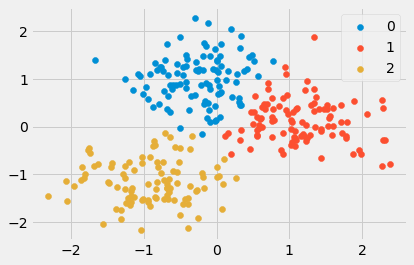

In [33]:
#Obtener valores unicos de cluster
u_labels = np.unique(label)

#Diagramar el resultado:
for i in u_labels:
    plt.scatter(scaled_features[label == i,0] , scaled_features[label == i,1] , label = i)
plt.legend()
plt.show()

## Elección del número apropiado de clústeres

### Método del codo

In [50]:
# Argumentos del algoritmo
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

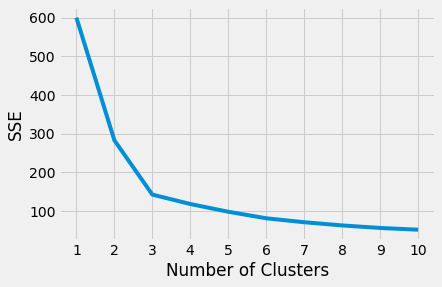

In [51]:
# Visualización de resultados
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [52]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 11),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

3

### Coeficiente de silueta

In [37]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

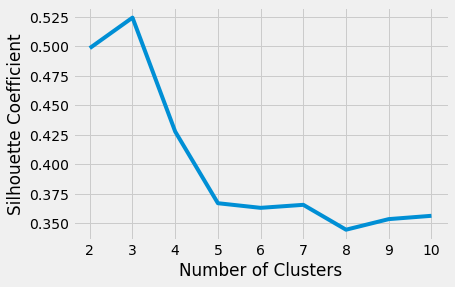

In [53]:
# Visualización de resultados
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()